Voltage values: [0.3398, 0.3105, 0.3105, 0.3984, 0.4023, 0.4297, 0.4336, 0.4336, 0.4297, 0.4023, 0.3711, 0.374, 0.4355, 0.4609, 0.4609, 0.4648, 0.4648, 0.4609, 0.4336, 0.4297, 0.4355, 0.4961, 0.4961, 0.498, 0.5234, 0.4961, 0.4922, 0.4609, 0.4336, 0.4609, 0.4961, 0.4961, 0.4805, 0.4648, 0.4609, 0.4297, 0.4023, 0.3711, 0.3735, 0.4023, 0.3984, 0.3711, 0.3672, 0.3398, 0.3105, 0.3047, 0.2891, 0.2734, 0.2773, 0.2773, 0.2773, 0.2773, 0.2495, 0.2461, 0.2422, 0.2148, 0.2109, 0.1992, 0.1836, 0.1797, 0.168, 0.1641, 0.1484, 0.1484, 0.1328, 0.123, 0.1211, 0.1172, 0.1172, 0.1016, 0.1016, 0.1016, 0.1016, 0.1016, 0.0898, 0.0859, 0.0859, 0.0781, 0.0742, 0.0703, 0.0742, 0.0859, 0.0859, 0.0898, 0.0898, 0.0859, 0.0859, 0.0781, 0.0859, 0.1055, 0.1245, 0.1523, 0.1797, 0.1797, 0.1797, 0.1836, 0.1953, 0.2148, 0.2422, 0.2485, 0.2773, 0.3047, 0.2773, 0.2495, 0.2461, 0.2422, 0.2148, 0.2109, 0.1953, 0.1836, 0.1797, 0.168, 0.1523, 0.1484, 0.1484, 0.1328, 0.1211, 0.1211, 0.1172, 0.1055, 0.1016, 0.1016, 0.0898, 0.08

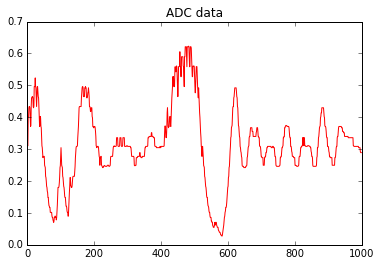

In [51]:
%matplotlib inline
from pynq.pmods import PMOD_ADC
import time
import matplotlib.pyplot as plt

# initialize ADC on PMOD 1 (JB).
# The ADC DA4 has 4 input channels at 12 bit resolution, however only the first 3: 
# V1, V2 and V3 (form 0 to 2) can be used.
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
pmod_adc = PMOD_ADC(1)

# read the tension value for V1 (V1 -> 0) and print it
#value = pmod_adc.read(0)
#print("Current voltage: " + str(value) + "V")

# start logging on V3 (V3 -> 2) with log interval of 1 ms
# NOTE: the current driver allows to log only one input at a time,
# to get data from multiple inputs at the same time you need to get them manually within a loop
#2 è IL CANALE DI LETTURA , 10 INTERVALLO TRA OGNI CAMPIONE(ms)
pmod_adc.start_log(2, 1)

# TEMPO DI ACQUISIZIONE

time.sleep(2)

# get and stop logging
values = pmod_adc.get_log()
print("Voltage values: " + str(values))

# draw graph
plt.plot(range(len(values)), values, 'r')
plt.title('ADC data')
plt.show()


In [52]:
import numpy as np
np.savetxt("RussataDoppia2.npy",values)

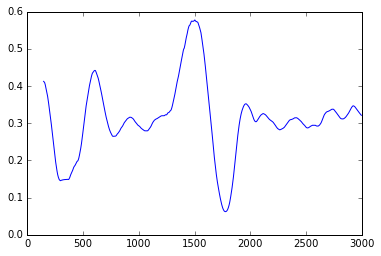

In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#russ1=np.loadtxt("Russata1.npy")
#russ2=np.loadtxt("Russata2.npy")
#russ3=np.loadtxt("Russata3.npy")
#batt=np.loadtxt("Battito.npy")
#sil=np.loadtxt("Silenzio.npy")
multipla=np.loadtxt("RussataDoppia2.npy")
#mediaruss1=pd.rolling_mean(russ1,50)
#mediaruss2=pd.rolling_mean(russ2,50)
#mediaruss3=pd.rolling_mean(russ3,50)
#mediabatt=pd.rolling_mean(batt,50)
#mediasil=pd.rolling_mean(sil,50)
mediadoppia=pd.rolling_mean(multipla,50)

t=np.arange(0,len(russ1)*3,3)
#plt.plot(t,mediaruss1,color='g')
#plt.show()
#plt.plot(t,mediaruss2,color='r')
#plt.show()
#plt.plot(t,mediaruss3,color='b')
#plt.show()
#plt.plot(t,mediabatt,color='black')
#plt.show()
#plt.plot(t,mediasil,color='y')
plt.plot(t,mediadoppia)
plt.show()

In [54]:
#cross-correlazione tra finestra con zero-padding e segnale 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft

def calcoloCCR(data, arrwnd):

#le due liste da confrontare devono avere stessa lunghezza

    template=arrwnd.tolist()
    
    #Zero padding
    for i in range (len(arrwnd),len(data)):
        template.append(0)

    # Fast Fourier Transform (FFT)
    Data= rfft(data)
   
    # Inverto il vettore template
    tempY = []
    while len(template) > 0:
        tempY.append(template.pop())
    
    Y = rfft(tempY)

    # Faccio la formula inversa della FFT
    CrossCorrelazione = irfft(Data*Y)
    print(len(CrossCorrelazione))
    
    #Normalizzazione
    #DataSTD=np.nanstd(data)
    #TemSTD=np.nanstd(template)
    #print(DataSTD)
    #print(TemSTD)
    
    x=np.arange(len(CrossCorrelazione))
    plt.plot(x,CrossCorrelazione)
    plt.xlabel("Campioni")
    plt.ylabel("CrossCorrelazione")
    plt.show()


998


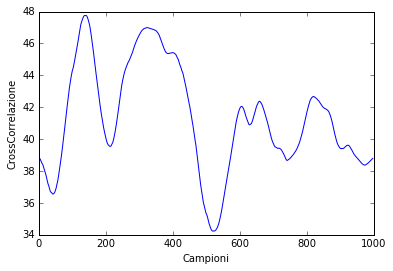

In [59]:
segnale=np.loadtxt("RussataDoppia2.npy")
arrwnd=np.loadtxt("Template.npy")
calcoloCCR(segnale,arrwnd)

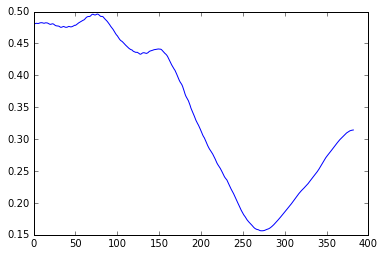

In [26]:
arrwnd=np.loadtxt("Template.npy")
plt.plot(np.arange(len(arrwnd)),arrwnd)
plt.show()